# Paso 1: Obtencion de datos

#Referencia:
https://github.com/taljuk01/Sentiment_Analysis_Politica-Argentina

In [10]:
import GetOldTweets3 as got


def scrapper(initdate, finaldate ,toptweets, maximo, words=[]):
    s1=[]
    lista_final=[]
    for word in words:
        try:
            s1.append(got.manager.TweetCriteria().setQuerySearch(word).setSince(initdate).setUntil(finaldate).setTopTweets(toptweets).setMaxTweets(int(maximo)))
        except: continue
    
    for i in range (len(s1)):
        lista_final.append(got.manager.TweetManager.getTweets(s1[i]))
    return lista_final

In [11]:
#KeyWords for each candidate
res0= ['Espert', '#Despertar', '@jlespert', '@luisrosalesARG','@FrenteDespertar', '#DejenCompetirAEspert']
res1=['macri', 'pichetto', '#JUNTOSPORELCAMBIO', '@MAURICIOMACRI', '@MIGUELPICHETTO', '@JUNTOSCAMBIOAR']
res2=['@cfkargentina', '@alferdez', 'fernandez-fernandez', '@frentedetodos', 'alberto fernandez']
res3=['@RLavagna', '#consensofederal', 'urtubey']
res4=['Nicolas del caño', '#FITunidad', '@FTE_izquierda', '@NicolasdelCano', '#YoVoteFITUnidad', '@RominaDelPla']
res5=['@juanjomalvinas', '#FrenteNOS']

In [12]:
resultado0=scrapper("2019-10-25", "2019-10-27",False, 3500, res0)#Espert
resultado1=scrapper("2019-10-25", "2019-10-27",False, 3500, res1)#Macri
resultado2=scrapper("2019-10-25", "2019-10-27",False, 3500, res2)#CFK
resultado3=scrapper("2019-10-25", "2019-10-27",False, 3500, res3)#Lavagna
resultado4=scrapper("2019-10-25", "2019-10-27",False, 3500, res4)#Delcaño
resultado5=scrapper("2019-10-25", "2019-10-27",False, 3500, res5)#malvinas

In [13]:
len(resultado0)

6

In [14]:
def extractor(tweets):
    l1,l2,l3,l4,l5,l6=[],[],[],[],[],[]

    for i in range(len(tweets)):
        for tweet in tweets[i]:
            l1.append(tweet.text)
            l2.append(tweet.date)
            l3.append(tweet.username)
            l4.append(tweet.hashtags)
            l5.append(tweet.favorites)
            l6.append(tweet.retweets)
        
    final=pd.DataFrame(list(zip(l1, l2,l3,l4,l5,l6)), 
                       columns =['Tweets', 'Date','User', 'hashtags', 'Favs','RT'])

    
    return final

In [15]:
import pandas as pd

df0=extractor(resultado0)
df1=extractor(resultado1)
df2=extractor(resultado2)
df3=extractor(resultado3)
df4=extractor(resultado4)
df5=extractor(resultado5)

In [16]:
df0.head()

Tweets  \
0  #VigiliaPorLaLibertad Mañana votan un millón d...   
1  Pobrecito, le pegaron un pijazo en la nuca y l...   
2  Eso condice con su condicion de seguidora de e...   
3  Tampoco olvidar el episodio del tiroteo a la c...   
4  Que se lave la jeta este que se cree? Es un de...   

                       Date             User               hashtags  Favs   RT  
0 2019-10-26 23:59:52+00:00        GFrondizi  #VigiliaPorLaLibertad   564  170  
1 2019-10-26 23:59:51+00:00  cristian_dureOK                            0    0  
2 2019-10-26 23:59:49+00:00  marineroderadio                            2    0  
3 2019-10-26 23:59:19+00:00        Maldana__                            2    4  
4 2019-10-26 23:59:13+00:00   mariel48465691                            0    0

In [17]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(7127, 6)
(13647, 6)
(14794, 6)
(853, 6)
(1311, 6)
(1097, 6)


In [20]:
dfa=df0.drop(['Date'], axis=1)
dfb=df1.drop(['Date'], axis=1)
dfc=df2.drop(['Date'], axis=1)
dfd=df3.drop(['Date'], axis=1)
dfe=df4.drop(['Date'], axis=1)
dff=df5.drop(['Date'], axis=1)

In [21]:
with pd.ExcelWriter(r'./5partidos.xlsx', engine='xlsxwriter',options={'strings_to_urls': False}) as writer:
     
        dfa.to_excel(writer, sheet_name='espert',index = None, header=True)
        dfb.to_excel(writer, sheet_name='macri',index = None, header=True)
        dfc.to_excel(writer, sheet_name='cfk',index = None, header=True)
        dfd.to_excel(writer, sheet_name='lavagna',index = None, header=True)
        dfe.to_excel(writer, sheet_name='fit',index = None, header=True)
        dff.to_excel(writer, sheet_name='centuirion',index = None, header=True)

# Paso2: Eliminando menciones conjuntas

In [251]:
import pandas as pd
dfa=pd.read_excel('5partidos.xlsx',sheet_name='espert',dtype={'Tweets':str,'User':str,'hashtags':str,'Favs':int,'RT':int})
dfb=pd.read_excel('5partidos.xlsx',sheet_name='macri')
dfc=pd.read_excel('5partidos.xlsx',sheet_name='cfk')
dfd=pd.read_excel('5partidos.xlsx',sheet_name='lavagna')
dfe=pd.read_excel('5partidos.xlsx',sheet_name='fit')
dff=pd.read_excel('5partidos.xlsx',sheet_name='centuirion')
print(dfa.shape)
print(dfb.shape)
print(dfc.shape)
print(dfd.shape)
print(dfe.shape)
print(dff.shape)

(7126, 5)
(13647, 5)
(14794, 5)
(853, 5)
(1311, 5)
(1097, 5)


In [252]:
men_FF=['alberto','cfk','cristina','fernandez','fernández','massa','ff','alferdez'] #formas de nombrar a Alberto o a su partido
men_MM=['macri','mm','mauricio','pichetto','vidal'] #formas de nombrar a Mauricio Macri o a su partido
men_FIT=['caño','nico','nicolas','nicolás'] #formas de nombrar a Nicolas del Caño  o a su partido
men_espert=['espert','josé','luis','profesor','rosales'] #formas de nombrar a Espert o a su partido
men_lavagna=['lavagna','roberto','urtubey'] #formas de nombrar a Lavagna o a su partido
men_cent=['gomez','centurion','centurión'] #formas de nombrar a Gomez Centurión o a su partido

In [253]:
others_M= men_FF +  men_FIT + men_espert + men_lavagna + men_cent # mención de otros candidatos en el dataset de Macri
others_FF= men_MM +  men_FIT + men_espert + men_lavagna + men_cent # mención de otros candidatos en el dataset de Alberto Fernandez
others_LAVG= men_FF +  men_FIT + men_espert + men_MM + men_cent # mención de otros candidatos en el dataset de Lavagna
others_FIT= men_FF +  men_MM + men_espert + men_lavagna + men_cent # mención de otros candidatos en el dataset de Nicolás del Caño
others_ESP= men_FF +  men_FIT + men_MM + men_lavagna + men_cent # mención de otros candidatos en el dataset de Espert
others_CENT= men_FF +  men_FIT + men_MM + men_lavagna + men_espert # mención de otros candidatos en el dataset de Gomez Centurión

In [254]:
import re
from nltk import word_tokenize
from nltk import punkt

In [255]:
def eliminador(tweet,nombres):
    temp=str(tweet)
    
    temp= re.sub(r'\W+', ' ',temp) #elimino simbolos, ya que aplicaremos esta función sobre los tweets sin procesar
                                   
    tokens=word_tokenize(temp) #tokenizamos
    for word in tokens:
        for nombre in nombres:
            x = re.findall(nombre, word.lower()) 
            if x :
                empty=''
                return empty # si encuentra la mención un candidato ajeno al partido, se elimina el tweet
            else:
                continue # continuamos hasta encontrar una coincidencia
    return tweet #si no se encuentra una mención de otro candidato, se retorna el tweet original

In [256]:
dfa.head()

Tweets             User  \
0  #VigiliaPorLaLibertad Mañana votan un millón d...        GFrondizi   
1  Pobrecito, le pegaron un pijazo en la nuca y l...  cristian_dureOK   
2  Eso condice con su condicion de seguidora de e...  marineroderadio   
3  Tampoco olvidar el episodio del tiroteo a la c...        Maldana__   
4  Que se lave la jeta este que se cree? Es un de...   mariel48465691   

                hashtags  Favs   RT  
0  #VigiliaPorLaLibertad   564  170  
1                    NaN     0    0  
2                    NaN     2    0  
3                    NaN     2    4  
4                    NaN     0    0

In [257]:
dfa['Tweets']=dfa["Tweets"].map(lambda x : eliminador(x,others_ESP))  #OJO, no aplicarlo sobre columna corregido

In [258]:
dfa.head()

Tweets             User  \
0                                                           GFrondizi   
1  Pobrecito, le pegaron un pijazo en la nuca y l...  cristian_dureOK   
2  Eso condice con su condicion de seguidora de e...  marineroderadio   
3  Tampoco olvidar el episodio del tiroteo a la c...        Maldana__   
4  Que se lave la jeta este que se cree? Es un de...   mariel48465691   

                hashtags  Favs   RT  
0  #VigiliaPorLaLibertad   564  170  
1                    NaN     0    0  
2                    NaN     2    0  
3                    NaN     2    4  
4                    NaN     0    0

In [259]:
dfa[dfa.Tweets==''].count() #Tweets eliminados

Tweets      1707
User        1707
hashtags     177
Favs        1707
RT          1707
dtype: int64

In [260]:
dfa=dfa[dfa.Tweets!='']

In [261]:
dfa.shape

(5419, 5)

In [262]:
dfb['Tweets']=dfb["Tweets"].map(lambda x : eliminador(x,others_M))

In [263]:
dfb.head()

Tweets             User  \
0                                                       joakoaldosivi   
1  Ni el mismísimo Macri es macrista https://twit...  Guillecasanova1   
2                                                           GFrondizi   
3  Con Macri también hubo medios de transporte a ...      GonzarezDC3   
4  Mi estimada Milita tu cerebrito no da para más...     TrigosoAriel   

                hashtags  Favs   RT  
0                    NaN     2    0  
1                    NaN     3    0  
2  #VigiliaPorLaLibertad   564  170  
3                    NaN     0    0  
4                    NaN     0    0

In [264]:
dfb=dfb[dfb.Tweets!='']
dfb.shape

(12024, 5)

In [265]:
dfc['Tweets']=dfc["Tweets"].map(lambda x : eliminador(x,others_FF))

In [266]:
dfc.head()

Tweets           User hashtags  \
0  Que no te queres ir a un país que tiene como p...       eltuca33      NaN   
1                                                     YoApoyoAChile      NaN   
2  El mismo narc, digo Kicillof* lo dijo, dejaron...     elpicante_      NaN   
3  https://m.facebook.com/story.php?story_fbid=32...   pepesiracusa      NaN   
4  Boleta completa y atroden @alferdez @CFKArgent...  Roscampitelli      NaN   

   Favs  RT  
0     0   0  
1     0   0  
2     1   0  
3     0   0  
4     5   0

In [267]:
dfc=dfc[dfc.Tweets!='']
dfc.shape

(13023, 5)

In [268]:
dfd['Tweets']=dfd["Tweets"].map(lambda x : eliminador(x,others_LAVG))

In [269]:
dfd=dfd[dfd.Tweets!='']
dfd.shape

(639, 5)

In [270]:
dfe['Tweets']=dfe["Tweets"].map(lambda x : eliminador(x,others_FIT))
dfe=dfe[dfe.Tweets!='']
dfe.shape

(1112, 5)

In [271]:
dff['Tweets']=dff["Tweets"].map(lambda x : eliminador(x,others_CENT))
dff=dff[dff.Tweets!='']
dff.shape

(789, 5)

# Paso 3: Creacion del corpus de entrenamiento

 Ante la necesidad de adaptar el algoritmo a las expresiones y modismos que utilizan los argentinos al momento de hablar sobre política, se decidió armar un corpus propio de entrenamiento y no hacer uso de corpus lingüísticos internacionales, como los que
provee la sociedad española de Natural Language Processing (corpus TASS).  
(De todos modos, para los interesados se deja el link para descargarlo : [corpus TASS](http://www.sepln.org/workshops/tass/tass_data/download.php?auth=SthaMsBsw4leVvKe1r9))  
Para armar este corpus político se clasificó manualmente cerca de 3 mil tweets del total de tweets scrapeados, con las leyendas positivo, negativo y ambiguo, siempre buscando que las 3 clases se encuentren balanceadas (mil tweets clasificados por
cada sentimiento).  

In [272]:
pwd

'/home/alex/Desktop/GitHub_repo/Sentiment_Analysis_Politica-Argentina'

In [273]:
ls

 5partidos_mes.xlsx                 imagenes/       README.md
 5partidos.xlsx                     PASO.ipynb     'Scrapping Sofmanarg.ipynb'
 cloud_candidates.png               PASO-v2.ipynb   todos_los_tweets.txt
 cloud.png                          PASO-v3.ipynb   Untitled1.ipynb
 datasets/                          PASO-v4.ipynb
 How_Not_to_Predict_Elections.pdf   PASO_v5.ipynb


In [274]:
test_ds=pd.read_excel('datasets/train_dataset_FINAL.xlsx')
test_ds.head()

Tweets polaridad
0  *678, DDD y Barone. *Urtubey y el premio al má...   AMBIGUO
1  *conversación con mi abuelo* -Te tengo que pas...  NEGATIVO
2                                       *Incomodidad   AMBIGUO
3  "boletas nefastas" *se levantan todos* hay uno...  NEGATIVO
4  ..atreves hacer comparaciones sin matizes entr...  NEGATIVO

In [24]:
test_ds.shape

(14026, 2)

In [281]:
test_ds.groupby('polaridad').count()

Tweets
polaridad        
AMBIGUO      4992
NEGATIVO     8331
POSITIVO      703

# Paso 4: Procesamiento del conjunto de entrenamiento

- Se convierte todo el texto a mínuscula
- Se eliminan todo tipo de caracteres no alfabéticos
- Se eliminan todo tipo de URL's 
- Se reemplazan usuarios por AT_USER
- Se detecta todo tipo de insulto o palabra despectiva y se lo transforma a la etiqueta 'toxicword', con el objetivo de unificar - PENDIENTE
- Se eliminan 'stopwords' (palabras que se repiten con mucha frecuencia)
- Se unifican las risas : 'ajjajajajajaj' ----> 'jaja', 'jojojo'----> jaja -PENDIENTE
- Se lleva a cabo un spellchecking, es decir, se corrigen las palabras mal escritas debido a modismos en redes sociales. - PENDIENTE  
Ej: 'xq'--> 'porque' , 'q' ---> 'que', etc.
- Se eliminan frases que hagan referencia a cosas dichas por otras personas.  - PENDIENTE



In [282]:
import pandas as pd
import numpy as np
import re
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
stopwords_spanish=stopwords.words('spanish')

In [283]:
stopwords_spanish

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [284]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
emoticons = emoticons_happy.union(emoticons_sad)

In [285]:
def text_cleaner(tweet):
        # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'pic.twitter\S+','some_pic',tweet)
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
        # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
      # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_spanish and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            #stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(word)
 
    return ' '.join(tweets_clean)

In [286]:
text_cleaner('EL 11 DE AGOSTO, HAY ALTERNATIVA | #SanFernando es una ciudad que quiere y puede avanzar. Desde @CFederalPBA estamos convencidos de que con equipo, propuestas concretas y los valores que faltan, podemos vivir mejor. @RLavagna @BuccaBali Lista 137 Apic.twitter.com/OJWmiO1oqo')

'11 agosto alternativa sanfernando ciudad quiere puede avanzar at_user convencidos equipo propuestas concretas valores faltan podemos vivir mejor at_user at_user lista 137 asome_pic'

In [287]:
text_cleaner('#11CádizCF| David Gil Iza Carcelen Fali Cala Espino Garrido Bodiger Álex Fernández Salvi Sánchez Javi Navarro Caye Quintana #CádizMálaga #MCFLive')

'11cádizcf david gil iza carcelen fali cala espino garrido bodiger álex fernández salvi sánchez javi navarro caye quintana cádizmálaga mcflive'

In [288]:
text_cleaner('12 años no les alcanzaron para lo IMPORTANTE? Manga de chorros, corruptos!!!! Cómo todo peroncho rufianes y mercenarios!!!!!')

'12 años alcanzaron importante manga chorros corruptos cómo peroncho rufianes mercenarios'

In [289]:
test_ds.head()

Tweets polaridad
0  *678, DDD y Barone. *Urtubey y el premio al má...   AMBIGUO
1  *conversación con mi abuelo* -Te tengo que pas...  NEGATIVO
2                                       *Incomodidad   AMBIGUO
3  "boletas nefastas" *se levantan todos* hay uno...  NEGATIVO
4  ..atreves hacer comparaciones sin matizes entr...  NEGATIVO

In [290]:
test_ds['tw_clean']=test_ds.Tweets.apply(lambda x: text_cleaner(x))
test_ds.head(10)

Tweets polaridad  \
0  *678, DDD y Barone. *Urtubey y el premio al má...   AMBIGUO   
1  *conversación con mi abuelo* -Te tengo que pas...  NEGATIVO   
2                                       *Incomodidad   AMBIGUO   
3  "boletas nefastas" *se levantan todos* hay uno...  NEGATIVO   
4  ..atreves hacer comparaciones sin matizes entr...  NEGATIVO   
5  Jajajaja...Naaa ..no votó Peronchos ..y está P...  NEGATIVO   
6              ..son mugre no los queremos kukasssss  NEGATIVO   
7  "Cuando se vaya Macri.Cdo ésto haya pasado".Se...   AMBIGUO   
8  ....sería de agradecer que ladrones como Macri...  NEGATIVO   
9  ....sería de agradecer que ladrones como Macri...  NEGATIVO   

                                            tw_clean  
0  678 ddd barone urtubey premio impresentable pa...  
1  conversación abuelo pasar dni averigues voto v...  
2                                        incomodidad  
3  boletas nefastas levantan solo levantó profeso...  
4  .. atreves hacer comparaciones matizes kirchne...  
5  jajajaja ... naaa .. votó peronchos .. pichett...  
6                          .. mugre queremos kukasss  
7  vaya macri.cdo ésto pasado replica millones ar...  
8  ... agradecer ladrones macri cría infiltrada a...  
9  ... agradecer ladrones macri cría infiltrada a...

In [291]:
test_ds.shape

(14026, 3)

In [292]:
from sklearn.model_selection import cross_validate,train_test_split,GridSearchCV

X_train, X_test, y_train, y_test= train_test_split(test_ds.tw_clean,test_ds.polaridad,test_size=0.2,random_state=42,shuffle=True)

In [293]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11220,)
(11220,)
(2806,)
(2806,)


Why SVC?: https://prakhartechviz.blogspot.com/2019/02/multi-label-classification-python.html

In [294]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC

pipeline1 = Pipeline([
                ('tfidf', TfidfVectorizer(sublinear_tf=True, # curva logarítmica
                                          ngram_range=(1,2), # uso de bigramas
                                          norm='l2', # se utlizan vectores con norma unitaria
                                          
                                         )),
                
                 ('clf', OneVsRestClassifier(LinearSVC(C=1,multi_class='ovr',random_state=1,tol=0.01)))
                 
            ])


In [295]:
#me falta hacer GridTest

In [296]:
pipeline1.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight=None,
                                                         dual=True,

In [297]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipeline1,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print('mean= ',scores.mean().round(2),'std= ',scores.std().round(2))

[0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02


In [298]:
from sklearn.model_selection import learning_curve
import numpy as np


N,train_lc,val_lc=learning_curve(pipeline1,X_train,y_train,cv=5,train_sizes=np.linspace(0.01,1,20))

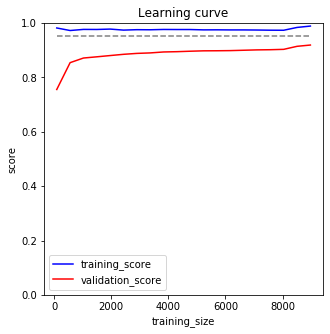

In [299]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)
plt.plot(N, np.mean(train_lc,1),color='blue',label='training_score')
plt.plot(N, np.mean(val_lc,1),color='red',label='validation_score')
plt.hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1],color='gray',linestyle='dashed')
ax.set_ylim(0,1)
ax.set_xlabel('training_size')
ax.set_ylabel('score')
ax.set_title('Learning curve')
ax.legend()

In [300]:
scores_list=['accuracy','precision_micro','recall_micro','f1_weighted']
for score in scores_list:
    scores=cross_val_score(pipeline1,X_train,y_train,cv=5,scoring=score)
    print(f'{score}=',scores)
    print('mean= ',scores.mean().round(2),'std= ',scores.std().round(2))

accuracy= [0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02
precision_micro= [0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02
recall_micro= [0.93582888 0.93360071 0.93181818 0.89616756 0.89884135]
mean=  0.92 std=  0.02
f1_weighted= [0.93385471 0.9320064  0.92883749 0.89294985 0.8960857 ]
mean=  0.92 std=  0.02


In [301]:
prediction=pipeline1.predict(X_test)

In [302]:
for (sample,pred,realpred) in zip(X_test,prediction,y_test):
    print(sample,'Pred-->',pred,'/',realpred)

nicolás caño libro “ juventud precarizada parte nueva clase trabajadora puede dar vuelta ” rebeldeoprecarizada Pred--> AMBIGUO / AMBIGUO
bueno salir fuerteee sobrino urtubey parabrisas Pred--> AMBIGUO / AMBIGUO
eduardo bucca si crece podrá haber aumentos salariales candidato lavagna ... Pred--> NEGATIVO / AMBIGUO
some_pic Pred--> AMBIGUO / AMBIGUO
yotevotoalberto votas boudou votas jaime votas lópez schiavi de.vido lópez 2 báez etchegaray picolotti si votas corruptos votas kirchner Pred--> NEGATIVO / NEGATIVO
fernandez díaz ... personaje nefasto responsable limitado poca audiencia gran grieta pais odiador serial pobre tipo seguramente morirá solo Pred--> NEGATIVO / NEGATIVO
vamos josé vamos Pred--> POSITIVO / POSITIVO
fácil decir voto vidal kici lousteau recalde ritondo massa pichetto stanley alicia dietrich vido muchachos jodan ... sola fórmula viejo robo juga categoría mauricio así cualquiera gana some_pic Pred--> POSITIVO / NEGATIVO
espert Pred--> AMBIGUO / AMBIGUO
uds almuerzan gen

veda recuerfa toque queda métansela orto vota fernandez fernandez Pred--> NEGATIVO / NEGATIVO
concepto país brancatelli acaso sabe provincias gob nac conviven armónicamente aunque pertenezcan mismo partido cada “ atiende juego ” vidal vidal morales morales macri macri pregunta brancatelli ridícula Pred--> NEGATIVO / NEGATIVO
roberto Pred--> AMBIGUO / AMBIGUO
some_pic Pred--> AMBIGUO / AMBIGUO
literal seleccion femenina tenia historia año pasado aun asi varios putean si tratara brasil jugando final mozambique si macri reelecto pagar karma retrasados mentales viven nostros serio idiotas Pred--> NEGATIVO / NEGATIVO
felicitaciones padre gente así da ganas redoblar esfuerzos si puede Pred--> AMBIGUO / AMBIGUO
vago arrogante candidatos atreve pedir aborto nofueley zurdaje cáncer país Pred--> NEGATIVO / NEGATIVO
menéndez pelotudo sirve jajajajasome_pic Pred--> AMBIGUO / AMBIGUO
imposible alcanzar buen puesto ir escalando política argentina tipo espert si empezado decís sistema corrupto come t

mm Pred--> AMBIGUO / AMBIGUO
some_pic Pred--> AMBIGUO / AMBIGUO
uh q gente mierda personas q dijeron menos peor q forma votar mierda referían fernández Pred--> NEGATIVO / NEGATIVO
ja ja epoca degeneracion 80 sos retrograda chabon Pred--> NEGATIVO / NEGATIVO
q grande licenciado ... caradura hdp Pred--> NEGATIVO / NEGATIVO
massa Pred--> AMBIGUO / AMBIGUO
serio vírgenes trabajan mcdonald's piensan votar espert idiotas libertarios justifica pelotudez viendo trece años ridículos sos empresario votar espert realidad tenés dónde caerte muerto some_pic Pred--> NEGATIVO / NEGATIVO
mm Pred--> AMBIGUO / AMBIGUO
estaria ponerla Pred--> AMBIGUO / AMBIGUO
así duhalde lavagna chorros Pred--> NEGATIVO / NEGATIVO
hipocritas politicos nefastos putearon ex presidenta hace 8 meses ahora estan dejate joder alejandro sos persona inteligente mediatica insentives gente votar panqueuqeda macri nooo tampoco Pred--> NEGATIVO / NEGATIVO
some_pic Pred--> AMBIGUO / AMBIGUO
¡ ¡ nuevo artículo blog número 200 Pred-->

encanta tema woz puta madre macri hijo puta Pred--> NEGATIVO / NEGATIVO
ff Pred--> AMBIGUO / AMBIGUO
si puede juntos cambio.boleta completa Pred--> POSITIVO / POSITIVO
vidal Pred--> AMBIGUO / AMBIGUO
cuanto vendés rúcula boliyón orto Pred--> NEGATIVO / NEGATIVO
repito pelotudo vos mano abierta pega otarios pedazo pancho Pred--> NEGATIVO / NEGATIVO
 Pred--> AMBIGUO / AMBIGUO
trump bolsonaro salvini macri boris johnson ... pensamos populismo fascista casual Pred--> NEGATIVO / NEGATIVO
programa busca talentos jurados claudia fernández pelado lacra ... remate pobre riccetto Pred--> NEGATIVO / NEGATIVO
país yendo mierda votan fanatismo serio siempre pensé fanáticos necesitaban razones campaña macri Pred--> NEGATIVO / NEGATIVO
vos andas necesitando leer tipo pude ser considerado periodista falta profesionalismo total lugar totalmente irresponsable parte solo argentina permiten cosas cómo Pred--> NEGATIVO / NEGATIVO
some_pic Pred--> AMBIGUO / AMBIGUO
caño Pred--> AMBIGUO / AMBIGUO
alberto-cri

In [303]:
np.unique(prediction,return_counts=True)

(array(['AMBIGUO', 'NEGATIVO', 'POSITIVO'], dtype='<U8'),
 array([ 919, 1796,   91]))

In [304]:
np.unique(y_test,return_counts=True)

(array(['AMBIGUO', 'NEGATIVO', 'POSITIVO'], dtype=object),
 array([ 957, 1716,  133]))

In [305]:
np.unique(y_train,return_counts=True)

(array(['AMBIGUO', 'NEGATIVO', 'POSITIVO'], dtype=object),
 array([4035, 6615,  570]))

In [306]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

report = classification_report(y_test, prediction, output_dict=True)

print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))
print('positive: ', report['POSITIVO'])
print('negative: ', report['NEGATIVO'])
print('ambiguo: ', report['AMBIGUO'])

Test accuracy is 0.9372772630078403
positive:  {'precision': 0.8461538461538461, 'recall': 0.5789473684210527, 'f1-score': 0.6875, 'support': 133}
negative:  {'precision': 0.9348552338530067, 'recall': 0.9784382284382285, 'f1-score': 0.9561503416856492, 'support': 1716}
ambiguo:  {'precision': 0.9510337323177367, 'recall': 0.9132706374085684, 'f1-score': 0.9317697228144989, 'support': 957}


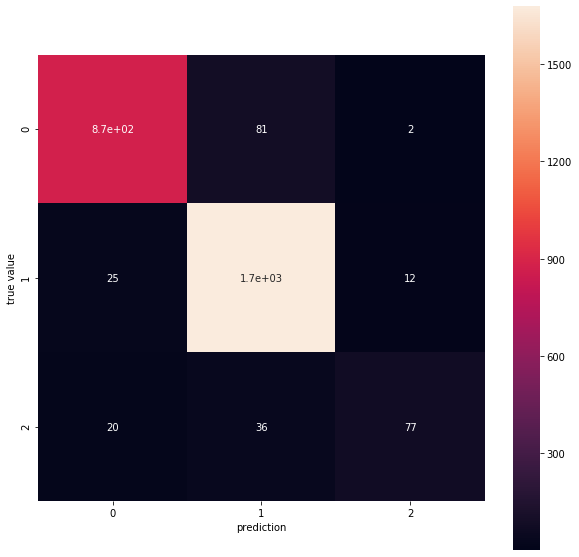

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

mat=confusion_matrix(y_test,prediction,)
plt.figure(figsize=(10,10))
sns.heatmap(mat,square=True,annot=True,cbar=True,)
plt.xlabel('prediction')
plt.ylabel('true value');

In [308]:
mat

array([[ 874,   81,    2],
       [  25, 1679,   12],
       [  20,   36,   77]])

### Saving the model!

In [351]:
import pickle

tuple_objects=(pipeline1,X_train,y_train,X_test,y_test,report)

pickle.dump(tuple_objects, open('paso_model.pkl','wb'))

In [360]:
#just checking if everything is there!!!

model=pickle.load(open('paso_model.pkl','rb'))



In [372]:
np.shape(model)

(6,)

In [378]:
(pickled_pipeline1, pickled_Xtrain, pickled_ytrain, pickled_Xtest, pickled_ytest,report)= (model)


In [379]:
pickled_pipeline1

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight=None,
                                                         dual=True,

In [380]:
report

{'AMBIGUO': {'precision': 0.9510337323177367,
  'recall': 0.9132706374085684,
  'f1-score': 0.9317697228144989,
  'support': 957},
 'NEGATIVO': {'precision': 0.9348552338530067,
  'recall': 0.9784382284382285,
  'f1-score': 0.9561503416856492,
  'support': 1716},
 'POSITIVO': {'precision': 0.8461538461538461,
  'recall': 0.5789473684210527,
  'f1-score': 0.6875,
  'support': 133},
 'accuracy': 0.9372772630078403,
 'macro avg': {'precision': 0.9106809374415299,
  'recall': 0.8235520780892832,
  'f1-score': 0.8584733548333827,
  'support': 2806},
 'weighted avg': {'precision': 0.9361686830571259,
  'recall': 0.9372772630078403,
  'f1-score': 0.9351016076500531,
  'support': 2806}}

# Paso 5: Uso del modelo

In [309]:
dfa.head()

Tweets             User  \
1  Pobrecito, le pegaron un pijazo en la nuca y l...  cristian_dureOK   
2  Eso condice con su condicion de seguidora de e...  marineroderadio   
3  Tampoco olvidar el episodio del tiroteo a la c...        Maldana__   
4  Que se lave la jeta este que se cree? Es un de...   mariel48465691   
5                 Hacela peor y anda por Espert ahre         Lauchus_   

  hashtags  Favs  RT  
1      NaN     0   0  
2      NaN     2   0  
3      NaN     2   4  
4      NaN     0   0  
5      NaN     0   0

In [310]:
dfa.shape

(5419, 5)

In [311]:
dfa.dtypes

Tweets      object
User        object
hashtags    object
Favs         int64
RT           int64
dtype: object

In [312]:
type(dfa.iloc[0,0])

str

In [313]:
text_cleaner(dfa['Tweets'].iloc[0])

'pobrecito pegaron pijazo nuca dejaron twitteando pelotudeces'

In [314]:
for i in range(len(dfa['Tweets'])):
    print(i,(dfa['Tweets'].iloc[i]),text_cleaner(str(dfa['Tweets'].iloc[i])))

0 Pobrecito, le pegaron un pijazo en la nuca y lo dejaron twitteando pelotudeces. pobrecito pegaron pijazo nuca dejaron twitteando pelotudeces
1 Eso condice con su condicion de seguidora de espert. O esos eran los de milei? condice condicion seguidora espert milei
2 Tampoco olvidar el episodio del tiroteo a la camioneta de Espert que resulto ser "camioneta de empresario de los Bingos en PBA" tampoco olvidar episodio tiroteo camioneta espert resulto ser camioneta empresario bingos pba
3 Que se lave la jeta este que se cree? Es un despota parece el hermano no reconocido de Espert lave jeta cree despota parece hermano reconocido espert
4 Hacela peor y anda por Espert ahre hacela peor anda espert ahre
5 Grande Profe!! grande profe
6 Grande Espert te vote, te lo dije en aeroparque si te acordas grande espert vote dije aeroparque si acordas
7 La tuya Giacomini? giacomini
8 JAJAKAKSKWKWKKA QUIERO TETAS AJJSJSJSJS jajakakskwkwkka quiero tetas ajjsjsjsjs
9 Algún día se van a dar cuenta que cuan

648 Yo que vos dejo de repetir cosas sin saber. Chile tiene los indices de pobreza mas bajos de latinoamerica. La desigualdad no es algo malo, la pobreza si lo es, y en chile es 3 veces menor que en argentinapic.twitter.com/5Q8yKTvRaG vos dejo repetir cosas saber chile indices pobreza mas bajos latinoamerica desigualdad malo pobreza si chile 3 veces menor argentinasome_pic
649 Aguante el profe espert https://twitter.com/tomiulla/status/1187670926219005953 … aguante profe espert
650 igual como q espert nunca nadie lo respeto así q no puede perder algo q no tiene igual q espert nunca nadie respeto así q puede perder q
651 @juanjomalvinas y @jlespert https://twitter.com/OsogordoIntenso/status/1188097199277826048 … at_user at_user
652 Anoten un poroto más JxC boleta completa. Uno menos para Espert. #EleccionesArgentina #SeamosLibresLoDemásSeArregla anoten poroto jxc boleta completa menos espert eleccionesargentina seamoslibreslodemássearregla
653 Es un aliadee Jajajaja aliadee jajajaja
654

1254 Hoy nos reunimos a las 16 horas en calle san juan 424 pb nqn te esperamos para afiliar q tengas un buen dia hoy reunimos 16 horas calle san juan 424 pb nqn esperamos afiliar q buen dia
1255 Eso es así en todo el planeta, cuando lo forzas al pueblo a ser **Dueño** de las cosas sin que exista un modelo sostenible logras Venezuela. así planeta forzas pueblo ser dueño cosas exista modelo sostenible logras venezuela
1256 Tu baja capacidad de diálogo esta mostrada por los insultos, juzgar sin conocer Muy típica conducta de algunos, que al no tener ideas que nacen de su razón, actúan de esa manera O sos inseguro, o estas muy nervioso? Siga su camino. Este diálogo no construye. Gracias baja capacidad diálogo mostrada insultos juzgar conocer típica conducta tener ideas nacen razón actúan manera sos inseguro nervioso siga camino diálogo construye gracias
1257 Ahí lo tenes al fanático ciego ahí tenes fanático ciego
1258 Contexto pls contexto pls
1259 Ándate! ándate
1260 que horror la entrevi

1740 Vendedores de ilusiones. A Tetaz se le nota menos que Espert, pero es lo mismo, el rubro de Concejeros del Principe, alimentados arribismo de discípulos de Nesutadt, pic.twitter.com/lDz5r2z28F vendedores ilusiones tetaz nota menos espert mismo rubro concejeros principe alimentados arribismo discípulos nesutadt some_pic
1741 Lo gracioso es que creas que Espert podría haber arreglado todo esto. gracioso creas espert podría haber arreglado
1742 la entrevista d pablo agustin a espert por faovr que falopa fumo ese hombre entrevista d pablo agustin espert faovr falopa fumo hombre
1743 Los liberales somos 3 gatos locos en este pais y encima tenemos que estar discutiendo y peleando entre nosotros por pelotudeces. Estamos muy verdes todavia. liberales 3 gatos locos pais encima discutiendo peleando pelotudeces verdes todavia
1744 Hace algo útil y Afiliate al PL! Es más importante que votar a Espert. El quiere Partido para el 2023, así que sin afiliación no hay partido. Afiliate al futuro ht

2460 Y vas a votar la candidatura testimonial de Espert viendo eso? vas votar candidatura testimonial espert viendo
2461 Espert es lo mejor que le puede pasar al país en estos momentos https://twitter.com/AkiNoMeMaquillo/status/1187744378674176000 … espert mejor puede pasar país momentos
2462 Como lloran....cuando el PL sea partido habrá internas, se postula ESPERT y alguien de su agrado y listo. lloran ... pl partido internas postula espert alguien agrado listo
2463 Malardo malardo
2464 Teléfono para Adam Smith, para EE. UU., Alemania, Inglaterra, China, Japón, Corea, etc. ..... teléfono adam smith ee uu alemania inglaterra china japón corea etc . ...
2465 7/ @jlespert propone: Eliminar el derecho de huelga de los docentes Modificar el Estatuto del Docente para: posibilitar despidos; determinar salarios en base a eficiencia; etc. Eliminar la coparticipación y transferir dinero según alumnos matriculados en cada escuela pic.twitter.com/vwJ0zKJzTM 7 at_user propone eliminar derecho huel

3036 @jlespert @JMilei @fspotorno @Miguel_Boggiano @JorgeNielsen1 @CarlosMelconian La historia les esta escupiendo la cara...https://twitter.com/adattellis/status/1187887234327994369 … at_user at_user at_user at_user at_user at_user historia escupiendo cara ...
3037 ese video esta buenisimo excepto que nunca habla de la mierda keynesiana que hicieron durante todo el mandato.. hacen lo mismo que todos, echarle la culpa al gobierno anterior... te puedo asegurar que una solucion liberal (NO KEYNESIANA) arregla todo sin culpar a nadie para atras video buenisimo excepto nunca habla mierda keynesiana hicieron mandato .. hacen mismo echarle culpa gobierno anterior ... puedo asegurar solucion liberal keynesiana arregla culpar nadie atras
3038 Tuvo que bajar una senadora por robar en un super. No tiene la mas mínima idea de conducción. No es político sólo un cúmulo de buenas intenciones. bajar senadora robar super mas mínima idea conducción político sólo cúmulo buenas intenciones
3039 Naif y ba

3691 Exacto! La soja estiró un poco el ciclo, pero allá vamos otra vez, eterna agonía a media agua, con gente que se enriquece cíclicamente y el resto detona. Lo indignante es los operadores periodisticos., Políticos, empresarios, que fomentan esto. exacto soja estiró ciclo allá vamos vez eterna agonía media agua gente enriquece cíclicamente resto detona indignante operadores periodisticos políticos empresarios fomentan
3692 jajajaj los taringueros nos salvaran del peronismo...pic.twitter.com/y3kGAwKXLe jajajaj taringueros salvaran peronismo ... some_pic
3693 ¿Este es tu candidato? @jlespert https://twitter.com/maritobaracus/status/1187881597913178115 … ¿ candidato at_user
3694 Entiendo, yo digo que lo definamos los votantes. entiendo digo definamos votantes
3695 Cómo viven sin querer donde nacieron !! cómo viven querer nacieron
3696 @juanjomalvinas @AgustinLaje @NickyMarquez1 @AmelieGranata @jlespert @elprestoOk Aquí vemos a este preclaro defensor de la ideología de género interpeland

4385 Docencia y transparencia.. Nunca visto en política.. Haz lo que digo y hago.. @jlespert https://youtu.be/GWweCvkHmVo docencia transparencia .. nunca visto política .. haz digo hago .. at_user
4386 Como vos Jose Luis vos jose luis
4387 El uno maestro de maestros! @jlespert https://twitter.com/nocontextpolarg/status/1187532318417788934 … maestro maestros at_user
4388 Capaz que no quiera seguir haciendo el ridículo si es un inoperante es estúpido capaz quiera seguir haciendo ridículo si inoperante estúpido
4389 Zurdito zurdito
4390 Capo bonelli capo bonelli
4391 TE AMO ESPERT SOS MI EJEMPLO A SEGUIR amo espert sos ejemplo seguir
4392 Si si
4393 Demencial. demencial
4394 nan nan
4395 Quiero ver las EspertFest cuando venga el narco socialismo bolivariano! Genios del voto quiero ver espertfest venga narco socialismo bolivariano genios voto
4396 Y en todo caso argentina comienza a desacelerar se a partir de 2016. caso argentina comienza desacelerar partir 2016
4397 La foto se la sacaron 

5036 Porqué no dicen que es una candidatura testimonial? Los q no daben de política creen q es una candidatura seria. No existe real sin representación federal. Votar x Espert es tirar el voto a los K, para el q le gustan, está perfecto; ‘los liberales’ no votamos lilitos ni Lilias... porqué dicen candidatura testimonial q daben política creen q candidatura seria existe real representación federal votar x espert tirar voto k q gustan perfecto ‘ liberales ’ votamos lilitos lilias ...
5037 Cagones, especuladores, bobos y descerebrados " liberales"del hoy. Va a estar difícil voten a Espert hoy ,en 4 o mil años. Hablan de la batalla cultural , voto estrategico y no sé qué mierda, en su cabeza tienen los mismos conflictos que los demás partidos.Son Argentinos. Punto cagones especuladores bobos descerebrados liberales hoy va difícil voten espert hoy 4 mil años hablan batalla cultural voto estrategico sé mierda cabeza mismos conflictos demás partidos.son argentinos punto
5038 Vuelvan y fundan

In [318]:
dfa["tw_clean"]=dfa["Tweets"].map(lambda x : text_cleaner(str(x))) #espert
dfb["tw_clean"]=dfb["Tweets"].map(lambda x : text_cleaner(str(x))) #MM
dfc["tw_clean"]=dfc["Tweets"].map(lambda x : text_cleaner(str(x))) #CFK
dfd["tw_clean"]=dfd["Tweets"].map(lambda x : text_cleaner(str(x))) #Lav
dfe["tw_clean"]=dfe["Tweets"].map(lambda x : text_cleaner(str(x))) #delcaño
dff["tw_clean"]=dff["Tweets"].map(lambda x : text_cleaner(str(x))) #centurion

In [319]:
dfb.head()

Tweets             User  \
1  Ni el mismísimo Macri es macrista https://twit...  Guillecasanova1   
3  Con Macri también hubo medios de transporte a ...      GonzarezDC3   
4  Mi estimada Milita tu cerebrito no da para más...     TrigosoAriel   
5  Pero resulta que esos años de Macri, Lenín y P...     malgraviahhh   
7  Pois é, mais Macri não era a solução? O proble...       allex_melo   

  hashtags  Favs  RT                                           tw_clean  
1      NaN     3   0                           mismísimo macri macrista  
3      NaN     0   0  macri medios transporte disposición voy requie...  
4      NaN     0   0  estimada milita cerebrito da comunistas izquer...  
5      NaN     0   2  resulta años macri lenín piñera respaldados ma...  
7      NaN     1   0  pois é mais macri não solução problema é achar...

In [320]:
dfa['predicted_polarity'] = pipeline1.predict(dfa['tw_clean']) 
dfb['predicted_polarity'] = pipeline1.predict(dfb['tw_clean'])
dfc['predicted_polarity'] = pipeline1.predict(dfc['tw_clean'])
dfd['predicted_polarity'] = pipeline1.predict(dfd['tw_clean'])
dfe['predicted_polarity'] = pipeline1.predict(dfe['tw_clean'])
dff['predicted_polarity'] = pipeline1.predict(dff['tw_clean'])


In [324]:
dfb.head()

Tweets             User  \
1  Ni el mismísimo Macri es macrista https://twit...  Guillecasanova1   
3  Con Macri también hubo medios de transporte a ...      GonzarezDC3   
4  Mi estimada Milita tu cerebrito no da para más...     TrigosoAriel   
5  Pero resulta que esos años de Macri, Lenín y P...     malgraviahhh   
7  Pois é, mais Macri não era a solução? O proble...       allex_melo   

  hashtags  Favs  RT                                           tw_clean  \
1      NaN     3   0                           mismísimo macri macrista   
3      NaN     0   0  macri medios transporte disposición voy requie...   
4      NaN     0   0  estimada milita cerebrito da comunistas izquer...   
5      NaN     0   2  resulta años macri lenín piñera respaldados ma...   
7      NaN     1   0  pois é mais macri não solução problema é achar...   

  predicted_polarity  
1           NEGATIVO  
3           NEGATIVO  
4           NEGATIVO  
5           NEGATIVO  
7           NEGATIVO

In [336]:
dfb.index

Int64Index([    1,     3,     4,     5,     7,     9,    10,    12,    13,
               14,
            ...
            13637, 13638, 13639, 13640, 13641, 13642, 13643, 13644, 13645,
            13646],
           dtype='int64', length=12024)

In [338]:
for i in dfb.index:
    print(dfb.tw_clean[i],'-->',dfb.predicted_polarity[i])

mismísimo macri macrista --> NEGATIVO
macri medios transporte disposición voy requiere mucha lógica saber cualquier candidato llena avenida --> NEGATIVO
estimada milita cerebrito da comunistas izquerdistas existen fijate chile ultraliberal piñera así macri argentina frente acontecimientos volvieron socialistas populistas ofreciendo oro moro pueblos espero opinión --> NEGATIVO
resulta años macri lenín piñera respaldados mas 500 años colonialismo oligarquías criollas desencadenaron comemierdismo neoliberal ejecuta recetas fmi --> NEGATIVO
pois é mais macri não solução problema é achar governar nações tão desiguais socialmente econômicamente funciona através uma receita bolo ... direita privatiza esquerda estatiza ... assim fica numa gangorra sem fim ... --> NEGATIVO
macri macho --> AMBIGUO
vamos macri --> POSITIVO
presidente at_user dios bendiga argentina domingo gustó q ganara indulgencias escapulario ajeno dinero maletín dinero d venezolanos construyen existo encima ruinas si regresa s

seamoslibreslodemassearregla --> AMBIGUO
despidiendo conciencia tranquila milite colabore desinteresadamente pude acompañe 24 marchas pais emocioné grité lloré indigna parte pueblo argentino vea claridad panorama politico macri gobernó --> NEGATIVO
aundiadelalbertazo macri vidal larreta 3 flores costa mierda sorete bosta --> NEGATIVO
macri puede mostrar obras gente metrobus agua potable gas natural luz casi cortes pavimentos rutas parques eólicos paseo bajo preguntarle magario hizo matanza 10.000 millones dio vidal --> NEGATIVO
siii --> NEGATIVO
excelente --> POSITIVO
macri morir fíjate mal interpretaste tweet --> NEGATIVO
creía boleta asi válida gracias aclaración --> NEGATIVO
comvencí vecino 78 años k va votar macri some_pic --> NEGATIVO
australia perdiendo macri --> AMBIGUO
macri pro vida deja gente elija representantes senado debe intervenir --> NEGATIVO
mañana vota libertad ladamosvueltajuntos at_user some_pic --> NEGATIVO
totalmente acuerdo --> AMBIGUO
difícil panorama argentina 

macri gato piñera culiao macripiñeralamismabilletera --> NEGATIVO
mamá envió mensaje viejo diciendole si votaba macri venga casa dijo bueno voy varela casa jaskhd --> NEGATIVO
piñera macri misma mierda estonohaterminado macripiñeralamismabilletera estonoseacaba aundiadelalbertazo votaysevansome_pic --> NEGATIVO
voto macri --> NEGATIVO
é macri --> AMBIGUO
laura alonso macri cambio ley ser abogada .. después mierda hizo oficina anticorrupción 1 causa cambiemos jaja locos triaca ministro trabajo pagaba aportes empleada .. descontaba lado --> NEGATIVO
macri señor kirchner ladrona --> NEGATIVO
años quizás ojalá ): macri mejor --> NEGATIVO
macri f --> AMBIGUO
vas votar macri hasjsh --> NEGATIVO
ganando macri alguien puede pensat niños caca cabeza --> NEGATIVO
nota mañana va macri explota gente bv buena onda ahre --> NEGATIVO
dársela sien mañana vaya macri --> NEGATIVO
macri hizo política fin --> AMBIGUO
some_pic --> AMBIGUO
macri mañana pobrecito some_pic --> NEGATIVO
aundiadelalbertazo si f

ay nena asquerosa insoportable dios voy dejar seguir dios dios insoportable hacerte ver --> NEGATIVO
ud señorita fiel exponente macrista antisemita bastante ignorante --> NEGATIVO
jajaja dentro 2 años van saltar q votarlo macri bla bla asi sucesivamente ... --> NEGATIVO
veda electoral mauricio macri pasó día quinta junto amigos familia --> NEGATIVO
macri vai perder --> AMBIGUO
lluvia q lleva lleva vos mauricio macri hijo puta --> NEGATIVO
sou macri até fim ass at_user --> AMBIGUO
voto macri xq va solucionar cagadas gobierno actual gobierno actual --> NEGATIVO
aqui do brasil orando --> NEGATIVO
tranquilo angel gana macri --> NEGATIVO
siguen fraude fiscalizar serio tan estupidos elecciones organizan si podes hacer eleccion podes gobernar paso mas limpias macri fiscales todas mesas pais cortenla estupideces --> NEGATIVO
coincidencias piñera ama pinochet macri miente pinocho voteysevan --> NEGATIVO
macri app controla clima sino explica odio --> NEGATIVO
creíste macri podía mejorar país cre

tranquilos fuga aseguraron varias generaciones ... --> NEGATIVO
mamá vota macri --> NEGATIVO
nan --> AMBIGUO
parafraseando autor pregunto lopez masia pelotudo hace dudas pelotudazo cree culpa argentina porcentaje ventajeros inmorales corruptos ladrones macri slogan si ser pelotudo --> NEGATIVO
nunca hizo bueno --> NEGATIVO
kukita tierno pegando fotitos menos tratá correlación thread ah ... sabes significa correlación thread si ... esperarse estorbe si gracias --> NEGATIVO
gente hace 30 años democráticos q votando problemas q señor trate habitantes republiqueta q entregue código fuente fraude puede hacer --> NEGATIVO
aundiadelalbertazo --> AMBIGUO
piensan sacando macri arregla ... costos importa sólo billetera impunidad ... --> NEGATIVO
recomiendo libro película crónica muerte anunciada capitalismo salvaje muerto si zurdo habilidoso pelota menos dicha ser zurdo nacional popular --> NEGATIVO
macri dominicano va hundir economía dominicana si llega presidente --> NEGATIVO
haría político re

at_user prefuntolos fiscales cambiemos credencial solo palabra si juan domingo porota dice cambiemos creo pichetto capo asesórame gato dormido --> NEGATIVO
vigiliaporlalibertad voto macri-pichetto lista completa caba --> POSITIVO
dinamitó cambiemos adentro compañero pichetto --> AMBIGUO
fumando pichetto chinwenwencha vayas dar vuelta --> AMBIGUO
claro chacho pichetto dos gotas agua dos tolerantes democráticos republicanos honestos progresistas --> NEGATIVO
australia pichetto usando pañal contándole cajero ypf full solía negociar leyes ir tele --> AMBIGUO
pasan cosas graves argentina preocupemos cuan puro gorilismo recalcitrante votalo pichetto calladito mamerto --> NEGATIVO
macri pichetto --> AMBIGUO
osea vas votar macri-pichetto some_pic --> NEGATIVO
jajaajja inés cansas humillarte ser k peronismo pichetto si bueno --> NEGATIVO
videos mariano martinez dan mas vergüenza ajena macri cantándole feliz cumpleaños pichetto --> NEGATIVO
pichetto cosas decía hace tiempo ... seis meses atrás -

voto macri-pichetto macripichetto 2019listacompleta --> POSITIVO
siglo iv ac aristoteles escribió siguiente silogismo denominado 27 traidores ganan elecciones pichetto traidor pichetto ganará elecciones --> AMBIGUO
voto libertad voto republica ... voto mauricio macri pichetto maría eugenia vidal boletacompleta some_pic --> POSITIVO
mayoria gente hace trabajar dia sos especial unica diferemcia empatia solidaridad tenes .. seguramente pichetto avergüenza votar representa bastante bien .. --> NEGATIVO
mm pichetto mev lista completa 2019 --> POSITIVO
bien pichetto some_pic --> AMBIGUO
vote macri pichetto some_pic --> NEGATIVO
ahora bullrich pichetto faurie ... mas millón infiltrados cubanos venezolanos calles chile vergüenza gobierno argentino yasevan --> NEGATIVO
corrientes reparte bolsitas mercaderías boleta macri pichetto --> NEGATIVO
pichetto hablo gusta gente cumple sueños va seguir gobernando macri really sueños cumplidos hablas menos seguro toda argentina cumplió sueños solos ricos 

cierre campaña maravilloso pusiste campaña hombro mauricio junto juliana pichetto merecías dudas hagamos esfuerzo venir córdoba acompañarte mas 150 mil personas vibraron discurso cada domingo macripresidentesome_pic --> NEGATIVO
hoy antiperonismo cordobés cantó feliz cumpleaños pichetto capitulación ideológica imposible vomitado dios perón evita historia triste solitario final --> NEGATIVO
motivo votar macri-pichetto --> NEGATIVO
todavía 30 minutos desearle pichetto día cumpleaños ... --> NEGATIVO
realmente impresionante pichetto sisepuedecordoba macripichetto 2019boletacompleta --> POSITIVO
feliz cumpleaños pichetto --> AMBIGUO
feliz cumple pichetto --> AMBIGUO
pichetto reconocio lider mundial creo q equivoco --> NEGATIVO
desempleado equivocaste pichetto --> AMBIGUO
feliz cumpleaños mike pichetto gracias lado honesto grieta some_pic --> POSITIVO
viva peronismo federal fuerza pichetto --> AMBIGUO
feliz cumple senador pichetto --> AMBIGUO
votos necesitamos salvarnos doce años destruyero

sisepuedecordoba genial gracias córdoba gracias pichetto gracias juliana x hablarle pueblo mil gracias amado presidente obvio negri genio total --> POSITIVO
si fórmula juliana-pichetto ganaban primera vuelta --> AMBIGUO
discurso pichetto impresionante viva patriaaa --> POSITIVO
sisepuede toda nación carrió pichetto mm --> AMBIGUO
pichetto peronista vamos carajo --> POSITIVO
pichetto convocó sectores acompañar macri urnas --> AMBIGUO
industria automotriz manda saludos pichetto --> AMBIGUO
juevesintratable grande macri pichetto cordoba economia corregible ... ideologia autoritarismo patoterismo somete .. --> NEGATIVO
bien negri pichetto vamos votar fiscalizar --> POSITIVO
grande pichetto --> AMBIGUO
pichetto convocó sectores acompañar macri urnas --> AMBIGUO
hizo bien tan naturales encantan ambos debo decir q aunque designación pichetto trago amargo ahora veo bárbaro --> NEGATIVO
todavía rio recuerdo spot pichetto hablando gestión macri boquita jaja casi da derrame hoy escuché --> NEGATI

fuerza ganador elegido sos vos mauricio --> NEGATIVO
si puede --> POSITIVO
jajajajaja tkm --> AMBIGUO
mañana pierde at_user --> NEGATIVO
 --> AMBIGUO
¿ propaganda último minuto veda ano --> NEGATIVO
da mismo chupe pana --> NEGATIVO
si mejor equipo de.los ultimos 50 mil años expertos hacer negocios costa cana van terminar --> NEGATIVO
verdad cada 9 cambio ciclo --> NEGATIVO
libres at_user demás importa yasevan seamoslibreslodemassearregla --> NEGATIVO
éste mier dice quiere gobernar país sabe llega esquina vez bajarse quedó par ayudar kirchner restando votos democracia olvidar éstas actitudes ... --> NEGATIVO
envidia --> NEGATIVO
some_pic --> AMBIGUO
defendiendo patria nuevas invasiones inglesas roban corona entregan territorio anglosionismo dylan gardel at_user gato querido cada día cantás mejor --> NEGATIVO
mañana cuánto --> NEGATIVO
chilena argenta --> AMBIGUO
piel faisán --> AMBIGUO
tranquilo presi at_user mañana va ser simulacro elecciones van ser 10 diciembre así enoje mande hacer 

necesitás tweet expliques razones --> NEGATIVO
macri hizo política fin --> AMBIGUO
some_pic --> AMBIGUO
peor matan hambre país tan generoso --> NEGATIVO
sé amor gracias quedarte niños atento trabajo equipo patria hijos futuro --> NEGATIVO
some_pic --> AMBIGUO
equivoques acuerdo macri muchas cosas sé ahora viene comunismo sé equivocás odio repito así --> NEGATIVO
claro si puede --> POSITIVO
at_user --> AMBIGUO
puta opción roben camiones luchar tampoco pase suerte --> NEGATIVO
mañana capital lado obras at_user incapacidad at_user q deja hundido fundido at_user q voten bien porteños sacar buena diferencia at_user rt at_user --> NEGATIVO
favor ganas mañana juan carlos mande buen asado peronista concha bien madre at_user --> NEGATIVO
recomiendo aprender intepretar textos saludos --> AMBIGUO
nan --> AMBIGUO
agarres cola cierres puerta saliendo rosada at_user sevieneelalbertazo --> AMBIGUO
decir siempre totalmente pedo --> NEGATIVO
avante argentina dios bendiga --> NEGATIVO
cabeza pulpo --> N

comente tuit tibios atacaron enojaron conmigo obligaron bloquearlos gracias at_user mensaje mejor ahora entiendensome_pic --> NEGATIVO
at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user up --> AMBIGUO
verdad decirle resentidos luchan vida digna hijodeputa --> NEGATIVO
igual comparar peras manzana menos pobres alemania chile país desigual latinoamérica --> NEGATIVO
vigilia electoral macri familia amigos at_user at_user --> NEGATIVO
nuncahizonada nadamåsquearruinaralpais seguiasídelfin --> AMBIGUO
total normalidad --> NEGATIVO
igual menem gato termina mal --> NEGATIVO
latinoamerica mosca sucios comunistas peor hermanos dejen engañar --> NEGATIVO
sigo --> NEGATIVO
descansar ... --> AMBIGUO
at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user up --> AMBIGUO
voto --> POSITIVO
parece quisieron comprar ábacos at_user dijo complicado usarlos --> NEGATIVO
ahi tribunales --> PO

idiotez total aumentaron año festejan 15 días ... merecemos ser uganda --> NEGATIVO
goberná gato pasaste haciendo papelones gira mientras quemaron dólares reserva loco tiras frases baratas mientras país hunde tenes vergüenza corazón basural historia --> NEGATIVO
vamos maru --> POSITIVO
at_user at_user at_user … --> AMBIGUO
comparto --> NEGATIVO
nan --> AMBIGUO
dedicate gobernar tafi vos --> NEGATIVO
libertad quitan tenés emigrar venezolanos xq país mas dictador --> NEGATIVO
q grande pato ... --> NEGATIVO
at_user cuenta … --> NEGATIVO
amanhã também temos eleições hermanos argentinos muito definido panorama teremos uma reviravolta do at_user --> NEGATIVO
nisman república libertad voto at_user sepuede vigiliaporlalibertad --> POSITIVO
si basura quedó bien demostrado quién nexos narcos quién quiere montar narco gobierno novolveran --> NEGATIVO
ja --> NEGATIVO
dice william wallace vio afiche quiere empiecen vuelta tortura lenta tramontina oxidado tipo feteando pavita pies cabeza --> NEGATIV

jajajajajajajajajaja hdp --> NEGATIVO
at_user vamos gato carajo some_pic --> POSITIVO
mañana llega telegrama despido at_user sepa comprender ud costo --> NEGATIVO
si nacionalizado podés elegir presidente caso caba necesitan 3 años residencia solo puede votar autoridades locales ¿ entraron 700 mil venezolanos caba 2016 si informamos verdad vamos ser mejores --> NEGATIVO
felicidades --> AMBIGUO
exterior at_user ¿ ¿ ¿ --> AMBIGUO
coincido populismo llevó países latinos fracaso siempre --> NEGATIVO
revisé cuenta at_user últimos 6 días encontré referencia acción gobierno tampoco mencionó corrida cambiaria devaluación situación reservas bcra situación chile elección bolivia presidente --> NEGATIVO
lareveliondelosmansos mañana vamos at_user at_user ladamosvueltasome_pic --> POSITIVO
felicitaciones sr presidente --> POSITIVO
vamos hacer pelotaaa macri gato vamosavolver --> NEGATIVO
siii visto desaparecer x sumidero varios x aquí x motivo bolu q menos interesa cuestión q quedamos silla salimos 

pobrecitos --> AMBIGUO
terrible manipulan información prensa meando tarro objetivos parciales principios distintos manifiestan población democrática apoyando ideas dictaduras venezuela mm boleta completa --> NEGATIVO
gracias pichetto admiro ayude presidente --> POSITIVO
succesfull could be ok for chile but not never will be wealthier than brazil or argentina so its wealth is not the correct word for them at_user at_user --> AMBIGUO
ver decime algún delincuente compró arma legal cometer delito progres inútiles políticos parásitos --> NEGATIVO
sr ritondo conozco personalmente felicito dedicacion sra vivia enfrente casa silvia vamos puedeee --> NEGATIVO
culpa estrepitoso desastre gobierno encabeza at_user ahora entendí --> NEGATIVO
pueblo argentino volverá caer nunca garras neoliberalismo ... oportunidad histórica construir pais merecen argentinavoto 2019 argentinadepiesome_pic --> NEGATIVO
aundiadelalbertazo voteysevan buensabado lanochedeml podemoshablar elecciones 2019 at_user llego di

dinamitó cambiemos adentro compañero pichetto --> AMBIGUO
dignidad queda ucr nació barrios yrigoyen alem luchando conserva hoy domina cúpula at_user --> NEGATIVO
domingo 27 at_user damoslavuelta eleccionesargentina felizsabado at_user larebeliondelosmansos at_user at_user at_user sisepuede argentina at_user at_user at_user argentina domingodeganarsegidores dale re tweets some_pic --> NEGATIVO
opina según color pastilla toma pensar van votar ojala suficientes ganar --> NEGATIVO
igual entendible tomaria miedo atenuante --> NEGATIVO
posta sabes rompen pelotas tema trabajo lpm quedé trabajo después paso mierda voto vez va at_user at_user at_user --> NEGATIVO
hola pablo veda jajaj mañana gato pandilla ladris van --> NEGATIVO
triste miedo pospongan principios --> NEGATIVO
nunca habias visto peronista --> NEGATIVO
arriba bandera argentina mas nunca --> NEGATIVO
escribas acordate ponerte cerebro --> NEGATIVO
at_user at_user ansiosa --> AMBIGUO
pichetto pinedo figuras dejarán senado baires líne

hoy x hoy planteada cosa aliados nombres partidos solo alianzas conveniencia sino explicame at_user at_user --> AMBIGUO
simplemente gracias --> POSITIVO
vamooosss mike ladamosvueltajuntos --> AMBIGUO
grace pasa mismo perfecto compañero fórmula pensar puteado ahora espero escucharlo vamos mike carajo sisepuedeargentina --> POSITIVO
mil gracias señor picheto apoyo presidente si puede mm2019 pichetto vidal ducote boleta completa --> POSITIVO
¿ 10 minutitos .. suficiente .. ¡ vamos at_user at_user si puede exterminar plaga definitivamente ¡ vamos carajo at_user at_user cada lugar limpiamos .. --> POSITIVO
si señor coincido 100 --> NEGATIVO
¿ lex luthor jokerm --> AMBIGUO
nan --> AMBIGUO
emocion genuina sana codo codo riendonos felices bailando cuateto c potro pais brilla sisepuedecordoba at_user at_user at_user --> AMBIGUO
lastima 4 añosno pudieron ... --> NEGATIVO
quierooo pichettooo --> AMBIGUO
así --> NEGATIVO
paciencia mike mil cierre campaña caballero tarde temprano agradecerá --> NEG

at_user feliz cumple --> AMBIGUO
at_user at_user at_user --> AMBIGUO
ídolo valiente jugado preciso sensato moderado coherente p t r i t admiramos --> NEGATIVO
gracias pichetto favor seguí politica --> NEGATIVO
vamos si puede --> POSITIVO
brillante --> NEGATIVO
gracias venir cba at_user pudimos darte mano llegabas escenario sisepuede --> POSITIVO
conocí persona realmente señor todas letras siento representada ud gracias --> NEGATIVO
sisepuedecordoba cambiemos at_user at_user at_user mm2019listacompletasome_pic --> AMBIGUO
gracias aceptar desafío compartir valores espero pasado feliz cumpleaños --> POSITIVO
pichetto pone adelante república partidario personal ... ganó respeto aquellos acusaban proteger loca tipo convicciones aveces pueden gustar ... republicano médula --> NEGATIVO
queres vuelva hoy dieron anticipo some_pic --> NEGATIVO
actualidad sisepuedecordoba cierre campaña at_user at_user at_user multitudinario convocó 50.000 personas esquina velez sarfield bv illía imágenes gentile

imponente cierre campaña mauricio macri cordoba feliz cumpleaños at_user hablo bien defendiendo valores argentinos vamos cambiar constitución expresó macri-picheto --> POSITIVO
sisepuedecordoba gracias at_user at_user at_user juliana gracias cordobeses une bandera himno valores consolidar vez todas república --> POSITIVO
regimen --> AMBIGUO
sisepuedeargentina lodamosvuelta lamarchadelmillon at_user at_user damos vuelta estalla corazón amo gato some_pic --> AMBIGUO
vamooosasss rezo argentina --> NEGATIVO
some_pic --> AMBIGUO
favor dios escuche --> NEGATIVO
dijeron decentes valores ... apareció breard acá junto candidato peronista arrepentido --> NEGATIVO
feliz cumpleaños ganemos --> AMBIGUO
x dios puedo mas emoción aguante cordoba at_user at_user vamos ganar si si --> POSITIVO
gracias gracias sisepuede macripresidente --> POSITIVO
at_user además desearle feliz cumpleaños quiero agradecerle acompañamiento retórica política queremos escuchar lleve cabo presencia importante seguramente vic

at_user dónde puede buscar boletas mendoza alguna sede sisepuedeargentina --> NEGATIVO
at_user at_user at_user at_user at_user at_user … --> AMBIGUO
at_user at_user at_user at_user at_user --> AMBIGUO
jaja puede ser tierna foto --> NEGATIVO
at_user at_user at_user at_user at_user --> AMBIGUO
at_user at_user at_user at_user at_user --> AMBIGUO
provincia santa fe únicamente rosario 3 at_user at_user at_user at_user some_pic --> AMBIGUO
at_user considerando cantidad videos personas entregando boletas falsas at_user impugnan voto si cara candidato boleta aunque falsa candidato votante eligió elecciones 2019 --> NEGATIVO
desmedido reclamo gente entienden cosas cuestan quieren regalen servicios aún siguen baratos media mundial acaso ud sabe cuánto paga europa mismo gastaria acá costos mismos allá acá joda --> NEGATIVO
at_user at_user at_user at_user at_user at_user at_user at_user --> AMBIGUO
ustedes at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user at_user maña

si massista ... --> NEGATIVO
enlace encontrá toda información respecto boletas oficiales at_user sisepuede --> NEGATIVO
gracias cordoba --> POSITIVO
regazzoni q va --> NEGATIVO
bajen brazos seguir luchando argentina dejemos manos ladrones cuarta corruptos hacen llamar socialistas --> NEGATIVO
jajjajajajajjajajajajajajajajaj --> AMBIGUO
gracias ud maestro da gusto escucharlo siempre sisepuedeargentina --> POSITIVO
tbt sábado pasado marcha sísepuede ministro at_user representante pueblo trabajo abrió puertas mercados gran ministro domingo posibilidad votar at_user at_user at_user --> NEGATIVO
el.lunes preparar billetera aumenta --> NEGATIVO
ahoraahora at_user gobernadora sanisidro presente cc at_user at_user at_user at_user at_user at_user at_user some_pic --> AMBIGUO
dejen paz gente existe veda cada sabe quién votar sino piense tranquilidad si verdad tan republicanos democráticos borren tuit fomenta persecución indeciso vale ganar k --> NEGATIVO
some_pic --> AMBIGUO
córdoba vos at_user 

mentís mentís mentís genética flaca suerte vas --> NEGATIVO
defensa sistema republicano marco respeto democracia constitucional --> NEGATIVO
cierre campaña at_user provincia acompañando at_user at_user equipo juntos podemos darla vuelta some_pic --> POSITIVO
jajajajajaja jajajajajaja acrdaste jóvenes poquito tarde --> AMBIGUO
boleta hoy casa dejaron gustavo pose fondo celeste lugar pose gabriel mercuri ... consulta sirve --> NEGATIVO
maravilloso cierre campaña emocionante si puede --> POSITIVO
olviden varisco peque garcia --> NEGATIVO
sísepuedechamigo sísepuede sedavuelta at_user at_user at_user --> AMBIGUO
diosaaa juliana q orgullo primera dama sostiene presidente amor acompañó cada marcha amor siii venceee --> POSITIVO
bueno persona acompañaba tampoco resolutivos forma actuar generó manto sospecha --> NEGATIVO
sísepuedechamigo sísepuede sedavuelta at_user at_user some_pic --> AMBIGUO
aunque escondidas mañana sigo entregando boletas --> NEGATIVO
sísepuedechamigo sísepuede sedavuelta a

In [339]:
Esp_pred=dfa.groupby('predicted_polarity').tw_clean.count()
Esp_pred

predicted_polarity
AMBIGUO     1177
NEGATIVO    4004
POSITIVO     238
Name: tw_clean, dtype: int64

In [340]:
MM_pred=dfb.groupby('predicted_polarity').tw_clean.count()
MM_pred

predicted_polarity
AMBIGUO     2655
NEGATIVO    7652
POSITIVO    1717
Name: tw_clean, dtype: int64

In [341]:
(MM_pred/MM_pred.sum()).round(2)

predicted_polarity
AMBIGUO     0.22
NEGATIVO    0.64
POSITIVO    0.14
Name: tw_clean, dtype: float64

In [342]:
CFK_pred=dfc.groupby('predicted_polarity').tw_clean.count()
CFK_pred

predicted_polarity
AMBIGUO     3369
NEGATIVO    8089
POSITIVO    1565
Name: tw_clean, dtype: int64

In [343]:
(CFK_pred/CFK_pred.sum()).round(2)

predicted_polarity
AMBIGUO     0.26
NEGATIVO    0.62
POSITIVO    0.12
Name: tw_clean, dtype: float64

In [344]:
Cano_pred=dfd.groupby('predicted_polarity').tw_clean.count()
Cano_pred

predicted_polarity
AMBIGUO     189
NEGATIVO    253
POSITIVO    197
Name: tw_clean, dtype: int64

In [345]:
malv_pred=dfe.groupby('predicted_polarity').tw_clean.count()
malv_pred

predicted_polarity
AMBIGUO     240
NEGATIVO    737
POSITIVO    135
Name: tw_clean, dtype: int64

# Vote Share Method

VotShare(c1)=[Pc1+Nc2]/[Pc1+Pc2+Nc1+Nc2]

### References

https://arxiv.org/ftp/arxiv/papers/1206/1206.5851.pdf

https://www.researchgate.net/publication/220876090_How_Not_to_Predict_Elections

In [347]:
universe=MM_pred['POSITIVO']+CFK_pred['NEGATIVO']+MM_pred['NEGATIVO']+CFK_pred['POSITIVO']
universe

19023

In [348]:
vot_share_MM=(MM_pred['POSITIVO']+CFK_pred['NEGATIVO'])/universe
vot_share_MM.round(2)

0.52

In [349]:
vot_share_CFK=(MM_pred['NEGATIVO']+CFK_pred['POSITIVO'])/universe
vot_share_CFK.round(2)

0.48

# Cloud of Words

In [134]:
df_all=pd.concat([dfa,dfb,dfc,dfd,dfe,dff])
df_all.shape

(32239, 7)

In [135]:
df_all.head()

Tweets             User  \
1  Pobrecito, le pegaron un pijazo en la nuca y l...  cristian_dureOK   
2  Eso condice con su condicion de seguidora de e...  marineroderadio   
3  Tampoco olvidar el episodio del tiroteo a la c...        Maldana__   
4  Que se lave la jeta este que se cree? Es un de...   mariel48465691   
5                 Hacela peor y anda por Espert ahre         Lauchus_   

  hashtags  Favs  RT                                           tw_clean  \
1              0   0  pobrecito pegaron pijazo nuca dejaron twittean...   
2              2   0           condice condicion seguidora espert milei   
3              2   4  tampoco olvidar episodio tiroteo camioneta esp...   
4              0   0  lave jeta cree despota parece hermano reconoci...   
5              0   0                       hacela peor anda espert ahre   

  predicted_polarity  
1           NEGATIVO  
2            AMBIGUO  
3           NEGATIVO  
4           NEGATIVO  
5           NEGATIVO

In [137]:
text=''.join(tweet for tweet in df_all['tw_clean'])
text

"pobrecito pegaron pijazo nuca dejaron twitteando pelotudecescondice condicion seguidora espert mileitampoco olvidar episodio tiroteo camioneta espert resulto ser camioneta empresario bingos pbalave jeta cree despota parece hermano reconocido esperthacela peor anda espert ahregrande profegrande espert vote dije aeroparque si acordasgiacominijajakakskwkwkka quiero tetas ajjsjsjsjsalgún día van dar cuenta vuelva socialismo pais van funfidoscuidado contigo grabboismañana voy 3er cordon conurbano cap cuidar votos futuro liberalismo argentino santoro at_user at_user at_user respeto espero q dsps ola populista logren poder jxc camino espert topo mafia kquiero ver gobernar espert resto reirme q dicen si pueden hacerchiques at_user at_user ... pregunta ... tal carrino ... ¿ alguien ahhh ... instituto cato ayudante inspector clouseau ...tomarse birra terminar votando espert veda surrealentrevista espert at_user ¡ parala lakaaa necesito nivel locura candidato acá bello profundamente horrible vez

In [138]:
with open("todos_los_tweets.txt", "w",encoding="utf-8") as text_file:
     text_file.write(text)

In [139]:
with open("todos_los_tweets.txt", "r",encoding="utf-8") as myfile:
     data=myfile.read()

In [142]:
from PIL import Image, ImageDraw
mask1=np.array(Image.open('cloud.png')) #imagen vectorizada

Generating Wordclouds:
https://www.datacamp.com/community/tutorials/wordcloud-python

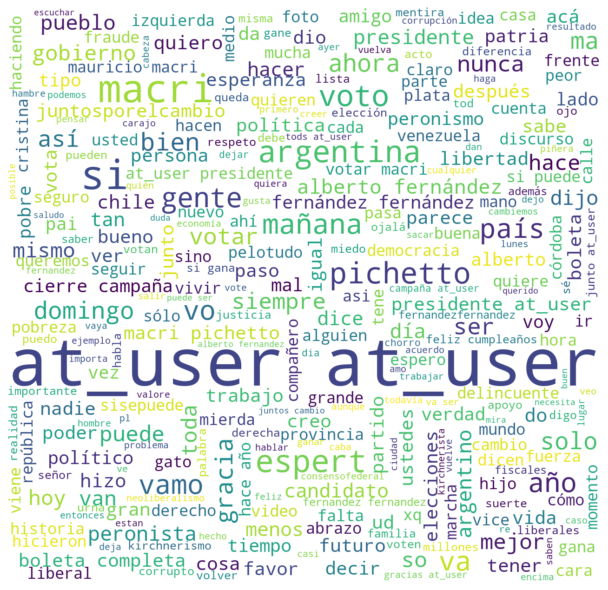

In [148]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud= WordCloud(width=1280,height=1240,
                    background_color='white',
                    min_font_size=5,
                    max_font_size=300,
                    max_words=300,
                    #mask=mask1, #si saco esto sale una cuadrada
                    contour_width='white',
                    stopwords=stopwords_spanish)

wordcloud.generate(data)

plt.figure(figsize=(10,8),facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file('./cloud.png')

In [149]:
dfb.head()

Tweets             User  \
1  Ni el mismísimo Macri es macrista https://twit...  Guillecasanova1   
3  Con Macri también hubo medios de transporte a ...      GonzarezDC3   
4  Mi estimada Milita tu cerebrito no da para más...     TrigosoAriel   
5  Pero resulta que esos años de Macri, Lenín y P...     malgraviahhh   
7  Pois é, mais Macri não era a solução? O proble...       allex_melo   

  hashtags  Favs  RT                                           tw_clean  \
1              3   0                           mismísimo macri macrista   
3              0   0  macri medios transporte disposición voy requie...   
4              0   0  estimada milita cerebrito da comunistas izquer...   
5              0   2  resulta años macri lenín piñera respaldados ma...   
7              1   0  pois é mais macri não solução problema é achar...   

  predicted_polarity  
1           NEGATIVO  
3           NEGATIVO  
4           NEGATIVO  
5           NEGATIVO  
7           NEGATIVO

In [166]:
MM_neg_wc=''.join(dfb[dfb['predicted_polarity']== 'NEGATIVO'].tw_clean)
MM_pos_wc=''.join(dfb[dfb['predicted_polarity']== 'POSITIVO'].tw_clean)
CFK_neg_wc=''.join(dfc[dfc['predicted_polarity']== 'NEGATIVO'].tw_clean)
CFK_pos_wc=''.join(dfc[dfc['predicted_polarity']== 'POSITIVO'].tw_clean)

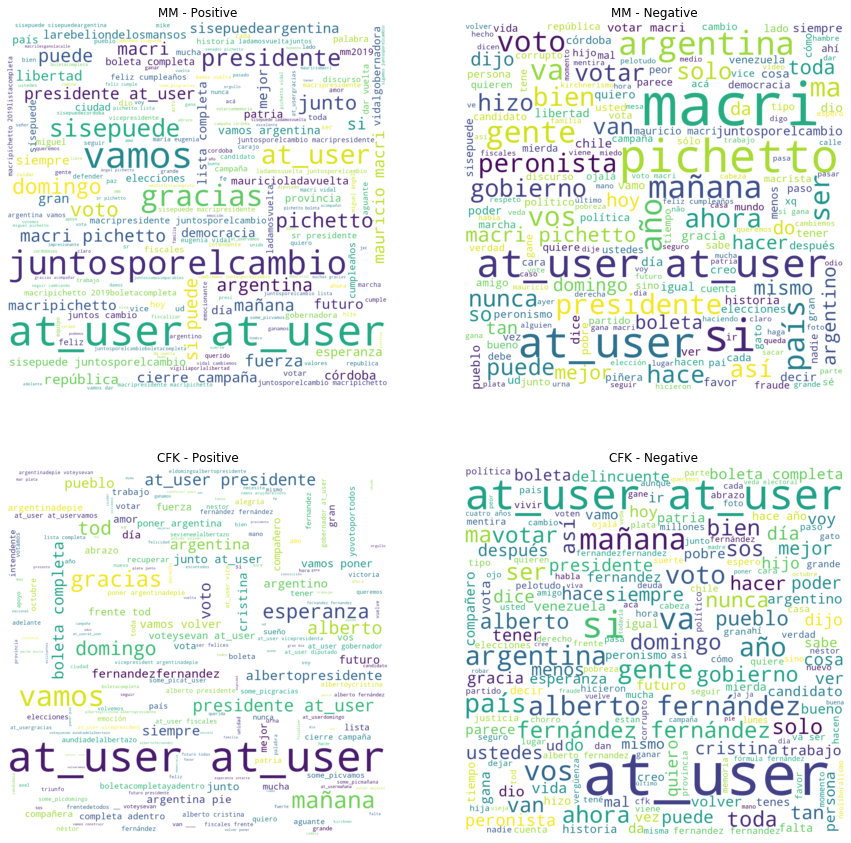

In [173]:

wordcloud= WordCloud(width=1280,height=1240,
                    background_color='white',
                    min_font_size=5,
                    max_font_size=200,
                    max_words=200,
                    #mask=mask1, #si saco esto sale una cuadrada
                    contour_width='white',
                    stopwords=stopwords_spanish)
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(wordcloud.generate(MM_pos_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('MM - Positive')

plt.subplot(222)
plt.imshow(wordcloud.generate(MM_neg_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('MM - Negative')

plt.subplot(223)
plt.imshow(wordcloud.generate(CFK_pos_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('CFK - Positive')

plt.subplot(224)
plt.imshow(wordcloud.generate(CFK_neg_wc),interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.title('CFK - Negative')

plt.savefig('./cloud_candidates.png')

plt.show()